 <h1><centre><u>ABOUT THE DATASET</u></centre></h1>

It is a historical dataset about the candidates who have applied for the loan and whether their loan was approved or not. The columns in the dataset include information like userId, their marital status, their gender, the number of people dependent on the person who is applying for the loan(if married), their education and employment status, other information related to their income and loan amount, the area to which they belong(urban, semiurban, rural) and finally the column which tells whether the loan was approved or not (Y for approval and N for rejection).
<br>
For Loan_Status, 1 is for approved and 0 is for rejected
<br>
For Property_Area, urban, semiurban, rural is 0, 1 , 2 respectively.
<br>
For Married, 1 for yes and 0 for no
<br>
For self employed, 1 for yes and 0 for no
<br>
For educated, 1 for graduate and 0 for not graduate
<br>
For gender, 1 for male and 0 for female
<br>
Main objective is to build a classifier and check its accuracy using Jaccard Index, F1- Score and Logloass.

<h1 align="center"> K-NEAREST NEIGHBOUR </h1>

In [74]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

#### Loading of Data

In [75]:
ds = pd.read_csv("LoanDataset.csv")
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,1003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,2,0
2,1005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


#### Data Cleaning

In [76]:
ds.dropna(inplace=True)

In [78]:
ds['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [77]:
ds.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [79]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null int64
Gender               480 non-null float64
Married              480 non-null float64
Dependents           480 non-null float64
Education            480 non-null int64
Self_Employed        480 non-null float64
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null int64
Loan_Status          480 non-null int64
dtypes: float64(8), int64(5)
memory usage: 52.5 KB


In [80]:
X = ds[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']].values
X[0:5]

array([[1.003e+03, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        4.583e+03, 1.508e+03, 1.280e+02, 3.600e+02, 1.000e+00, 2.000e+00,
        0.000e+00],
       [1.005e+03, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        3.000e+03, 0.000e+00, 6.600e+01, 3.600e+02, 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.006e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.583e+03, 2.358e+03, 1.200e+02, 3.600e+02, 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.008e+03, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        6.000e+03, 0.000e+00, 1.410e+02, 3.600e+02, 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.011e+03, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        5.417e+03, 4.196e+03, 2.670e+02, 3.600e+02, 1.000e+00, 0.000e+00,
        1.000e+00]])

In [81]:
y = ds['Loan_Status'].values
y[0:10]

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (384, 13) (384,)
Test set: (96, 13) (96,)


In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [84]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.54166667, 0.48958333, 0.54166667, 0.52083333, 0.60416667,
       0.5625    , 0.58333333, 0.5625    , 0.60416667])

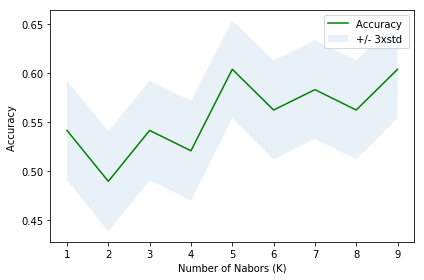

In [85]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [86]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6041666666666666 with k= 5


##### ACCURACY FROM F1-SCORE

In [87]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.5334400436767918

##### ACCURACY FROM JACCARD INDEX

In [88]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.6041666666666666

##### ACCURACY FROM LOGLOSS

In [92]:
from sklearn.metrics import log_loss
print(log_loss(y_test, yhat))


13.67185719298898


<h1 align="center"> DECISION TREE </h1>

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
LoanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LoanTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
LoanTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [97]:
# For making predictions

predTree = LoanTree.predict(X_test)

In [98]:
print (predTree [0:5])
print (y_test [0:5])

[0 1 1 1 1]
[0 1 1 1 1]


In [99]:
#For checkimg the accuracy of Decision Tree

from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  1.0


##### ACCURACY FROM F1-SCORE

In [132]:
print(f1_score(predTree, y_test))


1.0


##### ACCURACY FROM JACCARD INDEX

In [108]:
jaccard_similarity_score(y_test, predTree)

1.0

##### ACCURACY FROM LOGLOSS

In [133]:
print(log_loss(y_test, predTree))

9.992007221626413e-16


<h1 align="center"> SUPPORT VECTOR MACHINE </h1>

In [111]:
import pylab as pl
import scipy.optimize as opt
import matplotlib.pyplot as plt
from sklearn import svm

In [112]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [113]:
yhat = clf.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

##### ACCURACY FROM F1-SCORE

In [119]:

f1_score(y_test, yhat, average='weighted')

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.49376326963906586

##### ACCURACY FROM JACCARD INDEX

In [120]:
jaccard_similarity_score(y_test, yhat)

0.6354166666666666

##### ACCURACY FROM LOGLOSS

In [130]:
print(log_loss(y_test, yhat))

12.232766497287393


<h1 align="center"> LOGISTIC REGRESSION </h1>

In [123]:
X = np.asarray(ds[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
                   'LoanAmount','Loan_Amount_Term', 'Credit_History', 'Property_Area']])
X[0:5]


array([[1.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 4.58e+03,
        1.51e+03, 1.28e+02, 3.60e+02, 1.00e+00, 2.00e+00],
       [1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 3.00e+03,
        0.00e+00, 6.60e+01, 3.60e+02, 1.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 2.58e+03,
        2.36e+03, 1.20e+02, 3.60e+02, 1.00e+00, 0.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 6.00e+03,
        0.00e+00, 1.41e+02, 3.60e+02, 1.00e+00, 0.00e+00],
       [1.00e+00, 1.00e+00, 2.00e+00, 1.00e+00, 1.00e+00, 5.42e+03,
        4.20e+03, 2.67e+02, 3.60e+02, 1.00e+00, 0.00e+00]])

In [124]:
y = np.asarray(ds['Loan_Status'])
y [0:5]

array([0, 1, 1, 1, 1], dtype=int64)

In [125]:
#Normalization

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.47,  0.74,  0.22,  0.5 , -0.4 , -0.14, -0.03, -0.21,  0.28,
         0.41,  1.32],
       [ 0.47,  0.74, -0.76,  0.5 ,  2.5 , -0.42, -0.6 , -0.98,  0.28,
         0.41, -1.26],
       [ 0.47,  0.74, -0.76, -1.99, -0.4 , -0.49,  0.3 , -0.31,  0.28,
         0.41, -1.26],
       [ 0.47, -1.36, -0.76,  0.5 , -0.4 ,  0.11, -0.6 , -0.05,  0.28,
         0.41, -1.26],
       [ 0.47,  0.74,  1.2 ,  0.5 ,  2.5 ,  0.01,  1.  ,  1.52,  0.28,
         0.41, -1.26]])

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [127]:
yhat = LR.predict(X_test)
yhat

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

##### ACCURACY FROM F1-SCORE

In [134]:
f1_score(y_test, yhat, average='weighted')

0.5171830484330484

##### ACCURACY FROM JACCARD INDEX

In [129]:
jaccard_similarity_score(y_test, yhat)

0.6458333333333334

##### ACCURACY FROM LOGLOSS

In [131]:
print(log_loss(y_test, yhat))

12.232766497287393
